<a href="https://colab.research.google.com/github/macauli10/AnaliseVendasETL/blob/master/AnaliseVideoGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('video games sales.csv')

In [7]:
df.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
df.shape

(16598, 11)

Fazendo tratamento dos dados

In [6]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Os valores nulos não terão muita significancia no resultado da analise, não há necessidade de remoção

In [8]:
df.duplicated().sum()

np.int64(0)

Nenhum valor duplicado encontrado

Respondendo perguntas de negócio

Quais são os gêneros de jogos mais populares?

In [11]:
df['Genre'].describe()

,Genre
count,16598
unique,12
top,Action
freq,3316


In [12]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


Resposta: Jogos do genero de ação são os mais populares

Quais são os publishers mais bem-sucedidos?

In [15]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
...,...
Epic Games,0.01
UIG Entertainment,0.01
Commseed,0.01


Resposta: Nintendo lidera a lista de Publisher mais bem sucedido Globalmente, seguido de Electronic Arts, Activision, Sony e Ubisoft, Sendo esses os top 5 globalmente

Como as vendas de jogos variam por região?

In [16]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
print("Vendas na América do Norte:", df['NA_Sales'].sum())
print("Vendas na Europa:", df['EU_Sales'].sum())
print("Vendas no Japão:", df['JP_Sales'].sum())
print("Vendas em outras regiões:", df['Other_Sales'].sum())



Vendas na América do Norte: 4392.950000000001
Vendas na Europa: 2434.1299999999997
Vendas no Japão: 1291.0200000000002
Vendas em outras regiões: 797.7500000000001


In [23]:
total_vendas = df['Global_Sales'].sum()
print("Porcentagem de vendas na América do Norte:", (df['NA_Sales'].sum() / total_vendas) * 100)
print("Porcentagem de vendas na Europa:", (df['EU_Sales'].sum() / total_vendas) * 100)
print("Porcentagem de vendas no Japão:", (df['JP_Sales'].sum() / total_vendas) * 100)
print("Porcentagem de vendas em outras regiões:", (df['Other_Sales'].sum() / total_vendas) * 100)

Porcentagem de vendas na América do Norte: 49.245889216227006
Porcentagem de vendas na Europa: 27.287106914008717
Porcentagem de vendas no Japão: 14.472604490361462
Porcentagem de vendas em outras regiões: 8.942944518431826


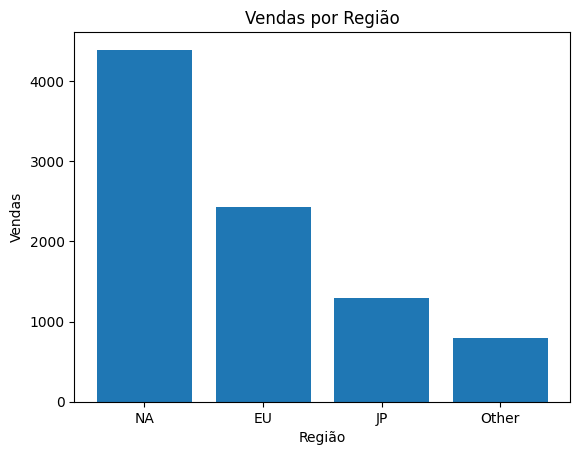

In [24]:
import matplotlib.pyplot as plt

regioes = ['NA', 'EU', 'JP', 'Other']
vendas = [df['NA_Sales'].sum(), df['EU_Sales'].sum(), df['JP_Sales'].sum(), df['Other_Sales'].sum()]

plt.bar(regioes, vendas)
plt.xlabel('Região')
plt.ylabel('Vendas')
plt.title('Vendas por Região')
plt.show()

Resposta: Nas regiões da America do Norte e da Europa é onde tem a maior quantidade de vendas, seguido de Japão em terceiro lugar e as demais regiões ficam e quarto

Quais são os jogos mais vendidos de todos os tempos?

In [25]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [26]:
df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
...,...
Lucian Bee's: Resurrection Supernova,0.01
Style Book: Cinnamoroll,0.01
Sora no Otoshimono: DokiDoki Summer Vacation,0.01


Resposta: Os jogos mais vendidos de todos os tempos é Wii Sports em primeiro isolado, seguido de GTA V, Super Mario Bros e Tetris

Existe uma correlação entre o ano de lançamento e as vendas?

In [28]:
df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)

,Global_Sales
Year,
2008.0,678.90
2009.0,667.30
2007.0,611.13
2010.0,600.45
2006.0,521.04
2011.0,515.99
2005.0,459.94
2004.0,419.31
2002.0,395.52


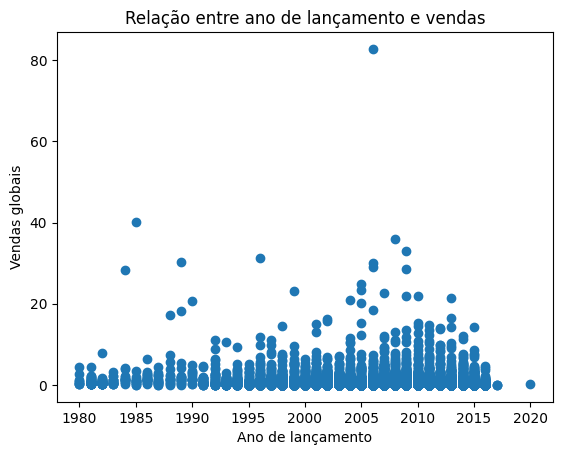

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df['Year'], df['Global_Sales'])
plt.xlabel('Ano de lançamento')
plt.ylabel('Vendas globais')
plt.title('Relação entre ano de lançamento e vendas')
plt.show()

Reposta: Não nenhuma correlação entre ano e quantidade de vendas, o grafico mostra bem essa dispersão e que os anos não tem influência na quantidade de vendas

Quais plataformas são mais populares para diferentes gêneros de jogos?

In [32]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False)

Platform  Genre     
PS3       Action        307.88
Wii       Sports        292.06
X360      Shooter       278.55
PS2       Sports        273.41
          Action        272.76
                         ...  
3DO       Simulation      0.02
NG        Sports          0.02
3DO       Puzzle          0.02
PS4       Puzzle          0.02
TG16      Shooter         0.02
Name: Global_Sales, Length: 293, dtype: float64

Resposta: Plataforma PS3 é mais popular com jogos do genereo de ação enquanto a plataform Wii para jogos de Esporte

Como as vendas de jogos mudaram ao longo do tempo?


In [37]:
df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)

,Global_Sales
Year,
2008.0,678.90
2009.0,667.30
2007.0,611.13
2010.0,600.45
2006.0,521.04
2011.0,515.99
2005.0,459.94
2004.0,419.31
2002.0,395.52


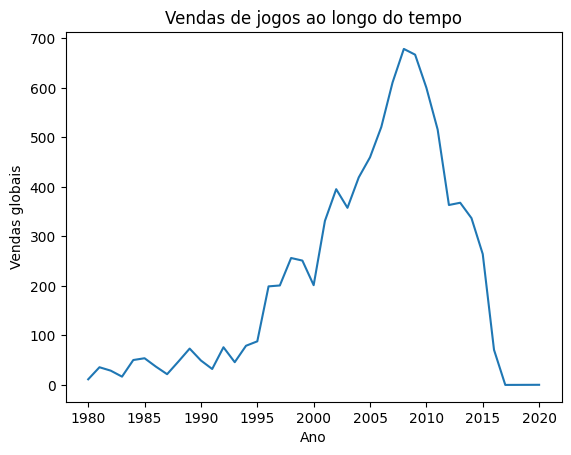

In [38]:
df.groupby('Year')['Global_Sales'].sum().plot(kind='line')
plt.xlabel('Ano')
plt.ylabel('Vendas globais')
plt.title('Vendas de jogos ao longo do tempo')
plt.show()

Resposta: Ouve um pico ao decorrer dos anos até o ano de 2008 onde começoua a queda de vendas, muito provavel por conta da entra de dispositovo moveis como celulares e tablets, e estes nao tem dados sobre, e essa queda advem tambem da diminuição de lancamentos de jogos e começando a atualizar os jogos ja lançados diminuindo a necessidade de ficar lançando jogos todos anos

In [39]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)